### About Walmart

Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.


### Business Problem

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

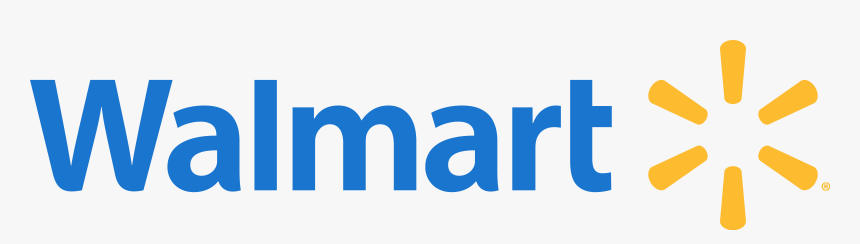

## Importing all the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as war
war.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../data/walmart_data.txt')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


### Baisc Descriptive statistsics

In [3]:
print(f'Total number of rows in dataset:{df.shape[0]}')
print(f'Total number of columns in dataset:{df.shape[1]}')

Total number of rows in dataset:550068
Total number of columns in dataset:10


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [5]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [6]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [7]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


## Utility Functions - Used during Analysis

In [8]:
def outlier_detect(df,colname,nrows=2,mcols=2,width=20,height=15):
    fig , ax = plt.subplots(nrows,mcols,figsize=(width,height))
    fig.set_facecolor("lightgrey")
    rows = 0
    for var in colname:        
        ax[rows][0].set_title("Boxplot for Outlier Detection ", fontweight="bold")
        plt.ylabel(var, fontsize=12)
        sns.boxplot(y = df[var],color='g',ax=ax[rows][0])
        
        sns.distplot(df[var],color='g',ax=ax[rows][1])
        ax[rows][1].axvline(df[var].mean(), color='r', linestyle='--', label="Mean")
        ax[rows][1].axvline(df[var].median(), color='g', linestyle='-', label="Median")
        ax[rows][1].axvline(df[var].mode()[0], color='royalblue', linestyle='-', label="Mode")
        ax[rows][1].set_title("Outlier Detection ", fontweight="bold")
        ax[rows][1].legend({'Mean':df[var].mean(),'Median':df[var].median(),'Mode':df[var].mode()})
        rows += 1

    plt.show()

## Validating Duplicate Records

In [9]:
# Dropping Duplicates if any
df=df.drop_duplicates()
df.shape

(550068, 10)

## Unique values (counts) for each Feature

In [10]:
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

In [11]:
df.loc[:,'Product_ID'].value_counts()

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: Product_ID, Length: 3631, dtype: int64

## Unique values (names) are checked for each Features

In [12]:
df['Product_ID'].unique()

array(['P00069042', 'P00248942', 'P00087842', ..., 'P00370293',
       'P00371644', 'P00370853'], dtype=object)

In [13]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [14]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [15]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [16]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [17]:
df['Marital_Status'].unique()

array([0, 1])

In [18]:
df['Product_Category'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19])

In [19]:
df.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


## Analyzing basic statistics about each feature, such as count, min, max, and mean

In [20]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


Note: there is a huge variance in Purchase columns.

## Data Preparation

### Dervied Columns

- Added 1 new feature from Age
    - "AgeCategory" - Teens, 20s, 30s and Above 40s

In [21]:
def age_mapping(df):
    
    if df == '0-17':
        return 'Teenager'
    elif df == '18-25':
        return 'Early 20s'
    elif df == '26-35':
        return 'Early 30s'
    elif df == '36-45':
        return 'Middle Age'
    elif df == '46-50':
        return 'Middle Age'
    elif df == '51-55':
        return 'Senior'
    else:
        return 'Senior'

df['Age_label'] = df['Age'].apply(age_mapping)

In [22]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,Age_label
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,Teenager
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,Teenager
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,Teenager
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,Teenager
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,Senior


## Univariante Analysis
  - Numerical Variables
    - Outlier Detection
  - Categorial variables 
    - Product_ID
    - Gender
    - MaritalStatus
    - AgeGroup
    - City_Category
    - Stay_In_Current_City_Years

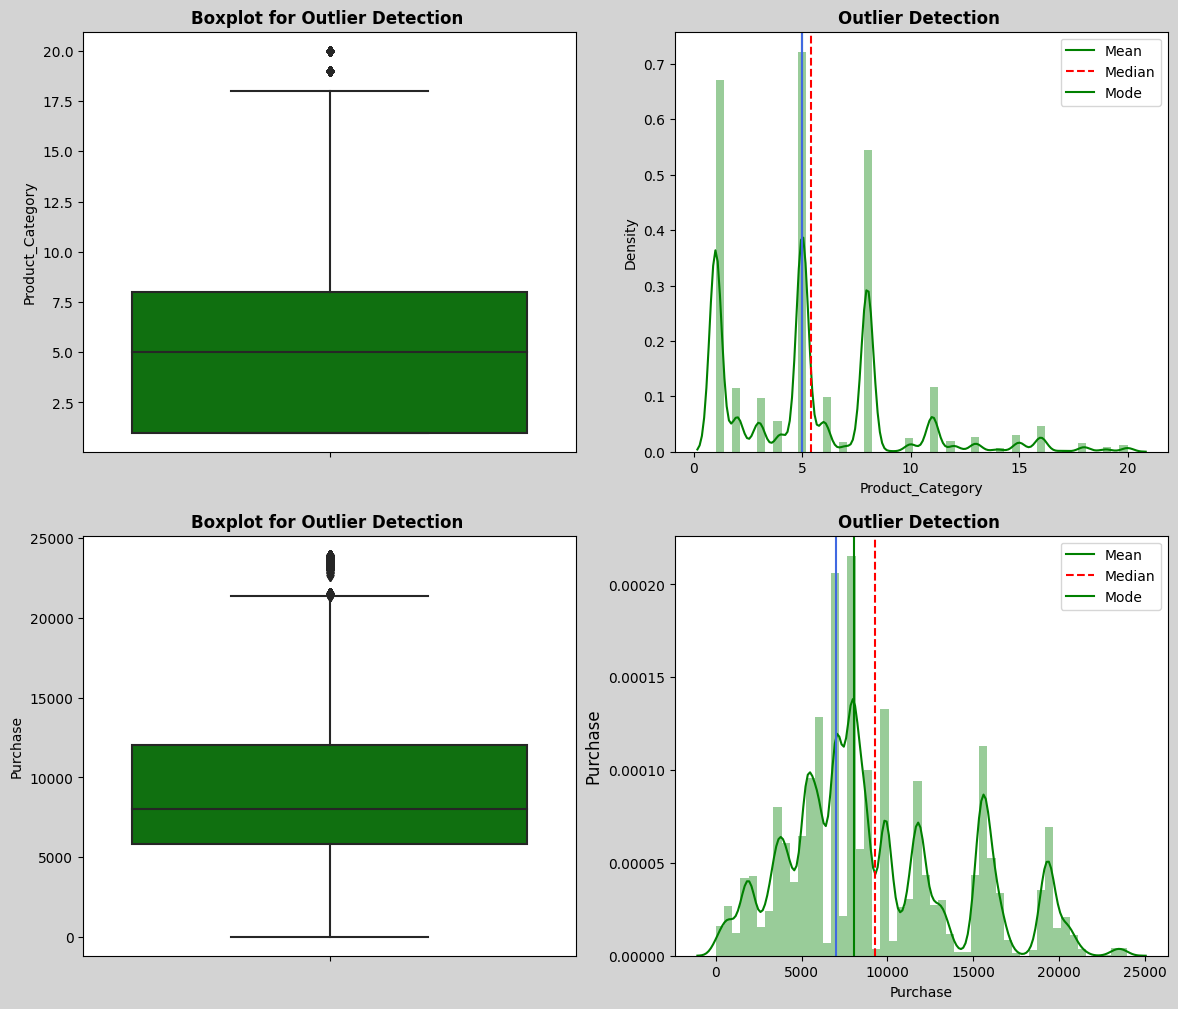

In [23]:
col_num = ['Product_Category','Purchase']
outlier_detect(df,col_num,2,2,14,12)

### Handling Outliers

In [24]:
df_v1 = df.copy()

#### Removing outliers for Income Feature

In [25]:
#Outlier Treatment: Remove top 5% & bottom 1% of the Column Outlier values
Q3 = df_v1['Purchase'].quantile(0.75)
Q1 = df_v1['Purchase'].quantile(0.25)
IQR = Q3-Q1
df_v1 = df_v1[(df_v1['Purchase'] > Q1 - 1.5*IQR) & (df_v1['Purchase'] < Q3 + 1.5*IQR)]
plt.show()

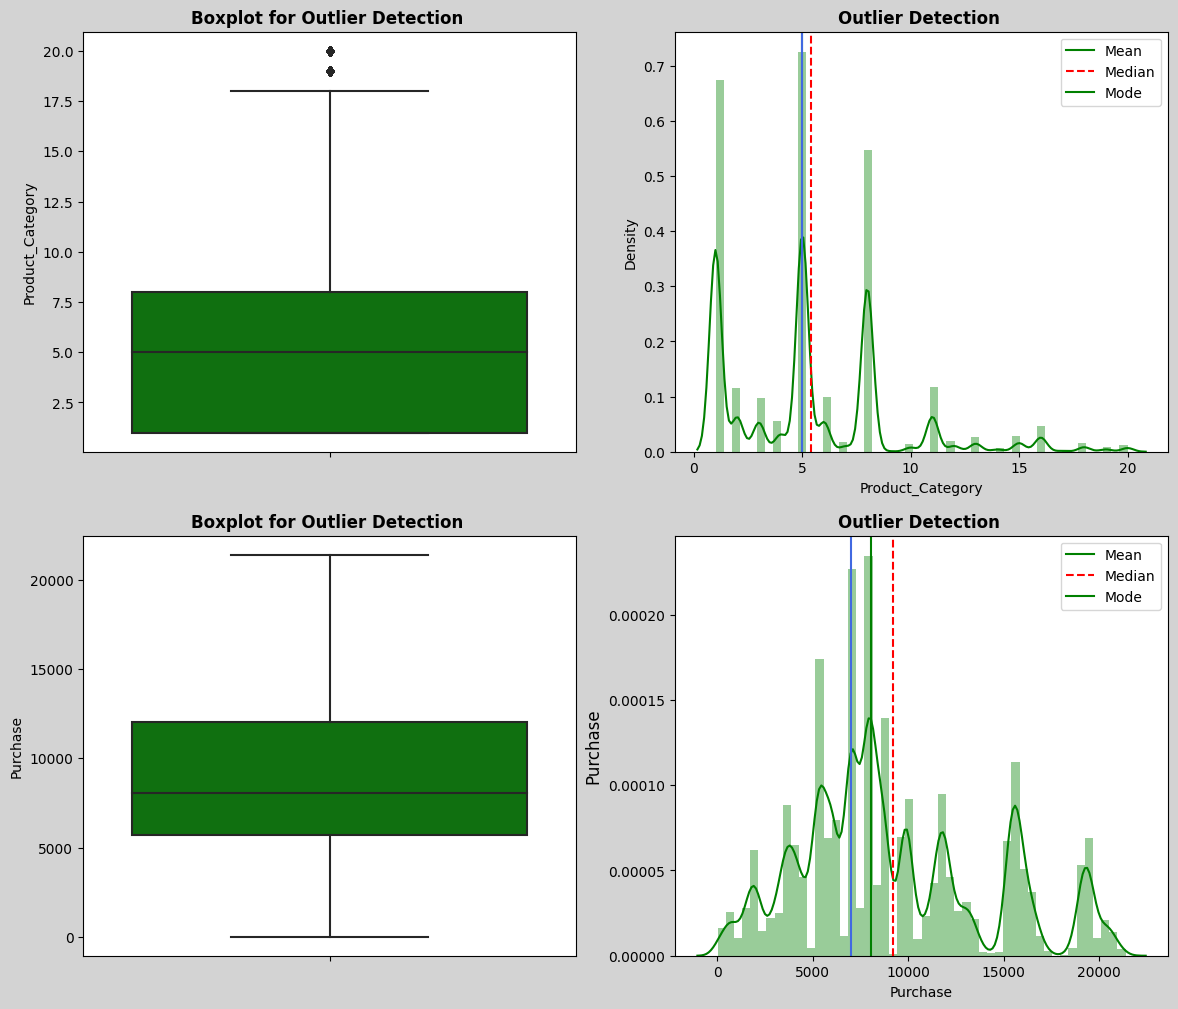

In [26]:
col_num = ['Product_Category','Purchase']
outlier_detect(df_v1,col_num,2,2,14,12)

In [27]:
df_v1.shape

(547391, 11)

## CLT and Confidence Interval

### Analysis for Gender

In [28]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,Age_label
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,Teenager
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,Teenager
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,Teenager
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,Teenager
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,Senior


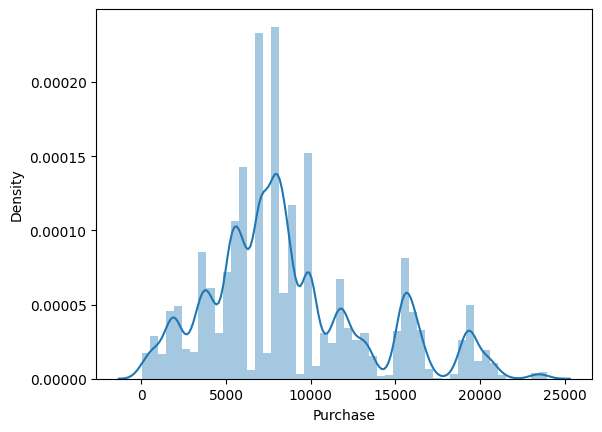

In [29]:
sns.distplot(df[df['Gender'] == 'F']['Purchase'],hist=True )
plt.show()

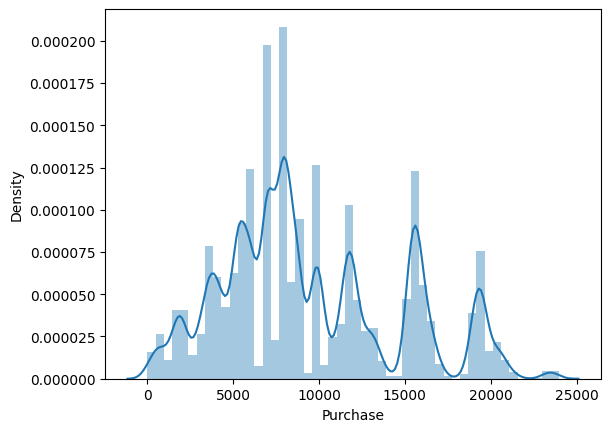

In [30]:
sns.distplot(df[df['Gender'] == 'M']['Purchase'],hist=True )
plt.show()

In [31]:
print('Population Mean of for Male Purchase: ',df[df['Gender'] == 'M']['Purchase'].mean())
print('Population Mean of for Female Purchase: ',df[df['Gender'] == 'F']['Purchase'].mean())

Population Mean of for Male Purchase:  9437.526040472265
Population Mean of for Female Purchase:  8734.565765155476


In [32]:
male_sample_means=[df[df['Gender']=='M']['Purchase'].sample(300).mean() for i in range(1000)]

In [33]:
female_sample_means=[df[df['Gender']=='F']['Purchase'].sample(300).mean() for i in range(1000)]

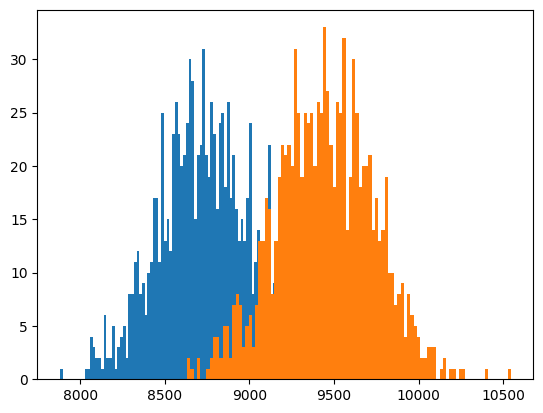

In [34]:
plt.hist(female_sample_means, bins=100)
plt.hist(male_sample_means, bins= 100)
plt.show()

#### Confidence intervals for males and females

In [36]:
np.mean(male_sample_means), np.std(male_sample_means)

(9447.803046666666, 286.95425105156096)

In [37]:
np.mean(female_sample_means), np.std(female_sample_means)

(8727.689353333333, 267.6944634022644)

#### what will be the Z score if the confidence interval is 95% and it is a one sided tale test

In [38]:
Lower_limit_males = np.mean(male_sample_means)- (np.std(male_sample_means)/np.sqrt(1000))
Upper_limit_males = np.mean(male_sample_means)+ (np.std(male_sample_means)/np.sqrt(1000))

print(Lower_limit_males, Upper_limit_males)

9438.728756490758 9456.877336842574


In [39]:
Lower_limit_females = np.mean(female_sample_means)- (np.std(female_sample_means)/np.sqrt(1000))
Upper_limit_females = np.mean(female_sample_means)+ (np.std(female_sample_means)/np.sqrt(1000))

print(Lower_limit_females, Upper_limit_females)

8719.224111119656 8736.15459554701


#### With 95% confidence we are able to find the confidence interval of purchases done by both male and female

In [40]:
Lower_limit_males= np.mean(male_sample_means)- (np.std(male_sample_means))*1.96
Upper_limit_males= np.mean(male_sample_means)+ (np.std(male_sample_means))*1.96

(Lower_limit_males, Upper_limit_males)

(8885.372714605606, 10010.233378727726)

In [41]:
Lower_limit_females= np.mean(female_sample_means)- (np.std(female_sample_means))*1.96
Upper_limit_females= np.mean(female_sample_means)+ (np.std(female_sample_means))*1.96

(Lower_limit_females, Upper_limit_females)

(8203.008205064894, 9252.370501601772)

In [43]:
# Get the corresponding values of 2.5th and 97.5th percentiles
conf_interval = np.percentile(male_sample_means,[2.5,97.5])
# Print the interval
print("The confidence interval: ",conf_interval)

The confidence interval:  [8877.50391667 9995.459     ]


In [44]:
# Get the corresponding values of 2.5th and 97.5th percentiles
conf_interval = np.percentile(female_sample_means,[2.5,97.5])
# Print the interval
print("The confidence interval: ",conf_interval)

The confidence interval:  [8188.86008333 9263.11525   ]


### Analysis for  Married vs Unmarried

In [45]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,Age_label
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,Teenager
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,Teenager
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,Teenager
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,Teenager
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,Senior


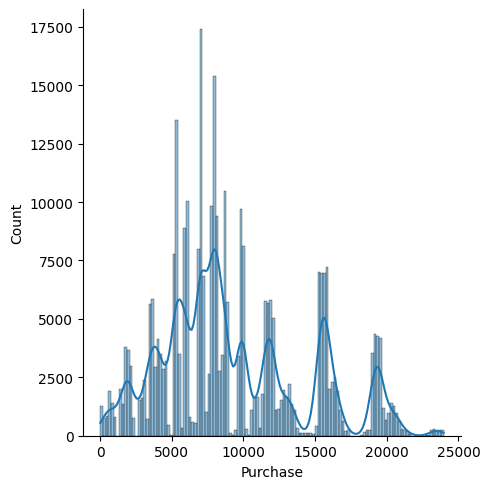

In [46]:
#Assuming 0 is unmarried and 1 is married
sns.displot(df[df['Marital_Status'] == 0]['Purchase'], kde=True)
plt.show()

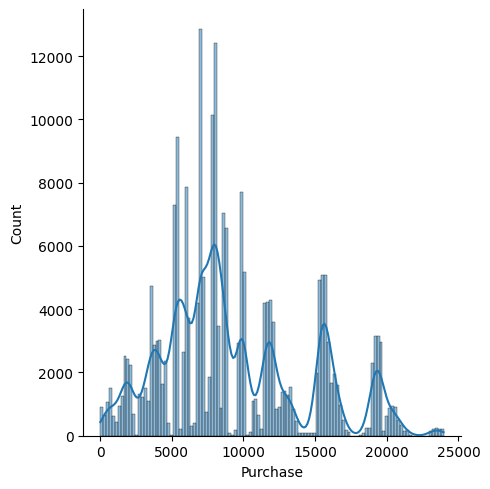

In [47]:
sns.displot(df[df['Marital_Status'] == 1]['Purchase'], kde=True)
plt.show()

In [48]:
print('Population Mean of for Unmarried Purchase: ',df[df['Marital_Status'] == 0]['Purchase'].mean())
print('Population Mean of for Married Purchase: ',df[df['Marital_Status'] == 1]['Purchase'].mean())

Population Mean of for Unmarried Purchase:  9265.907618921507
Population Mean of for Married Purchase:  9261.174574082374


In [49]:
unmarried_sample_means=[df[df['Marital_Status']== 0]['Purchase'].sample(300).mean() for i in range(1000)]
married_sample_means=[df[df['Marital_Status']== 1]['Purchase'].sample(300).mean() for i in range(1000)]

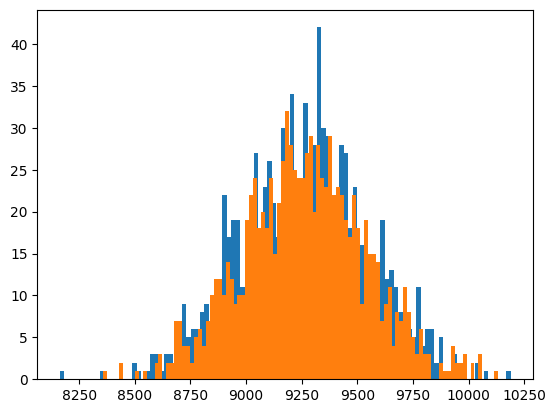

In [50]:
plt.hist(unmarried_sample_means, bins=100)
plt.hist(married_sample_means, bins= 100)
plt.show()

#### Confidence intervals for unmarried and married

In [51]:
print(f"unmarried sample mean: {np.mean(unmarried_sample_means)} and standard deviation: {np.std(unmarried_sample_means)}")
print(f"married sample mean: {np.mean(married_sample_means)} and standard deviation: {np.std(married_sample_means)}")


unmarried sample mean: 9263.877523333333 and standard deviation: 286.2797621934598
married sample mean: 9263.042756666668 and standard deviation: 278.2535112624831


#### what will be the Z score if the confidence interval is 95% and it is a one sided tale test

In [53]:
Lower_limit_unmarried = np.mean(unmarried_sample_means)- (np.std(unmarried_sample_means)/np.sqrt(1000))
Upper_limit_unmarried = np.mean(unmarried_sample_means)+ (np.std(unmarried_sample_means)/np.sqrt(1000))

print(f'Lower Limit Unmarried: {Lower_limit_unmarried} and Upper Limit unmarried: {Upper_limit_unmarried}')


Lower Limit Unmarried: 9254.824562367905 and Upper Limit unmarried: 9272.93048429876


In [54]:
Lower_limit_married = np.mean(married_sample_means)- (np.std(married_sample_means)/np.sqrt(1000))
Upper_limit_married = np.mean(married_sample_means)+ (np.std(married_sample_means)/np.sqrt(1000))

print(f'Lower Limit married: {Lower_limit_married} and Upper Limit married: {Upper_limit_married}')


Lower Limit married: 9254.24360804138 and Upper Limit married: 9271.841905291954


In [55]:
# Get the corresponding values of 2.5th and 97.5th percentiles
conf_interval = np.percentile(unmarried_sample_means,[2.5,97.5])
# Print the interval
print("The confidence interval: ",conf_interval)

The confidence interval:  [8714.5565     9814.56716667]


In [56]:
# Get the corresponding values of 2.5th and 97.5th percentiles
conf_interval = np.percentile(married_sample_means,[2.5,97.5])
# Print the interval
print("The confidence interval: ",conf_interval)

The confidence interval:  [8704.25866667 9798.38291667]


### Analysis for Age Group

In [57]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,Age_label
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,Teenager
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,Teenager
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,Teenager
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,Teenager
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,Senior


In [58]:
df['Age_label'].unique()

array(['Teenager', 'Senior', 'Early 30s', 'Middle Age', 'Early 20s'],
      dtype=object)

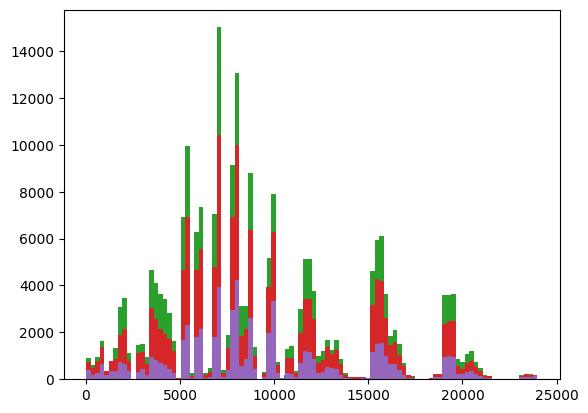

In [59]:
plt.hist(df[df['Age_label'] == 'Teenager']['Purchase'],bins=100)
plt.hist(df[df['Age_label'] == 'Early 20s']['Purchase'],bins=100)
plt.hist(df[df['Age_label'] == 'Early 30s']['Purchase'],bins=100)
plt.hist(df[df['Age_label'] == 'Middle Age']['Purchase'],bins=100)
plt.hist(df[df['Age_label'] == 'Senior']['Purchase'],bins=100)
plt.show()

In [60]:
print('Population Mean of for Teenagers Purchase: ',df[df['Age_label'] == 'Teenager']['Purchase'].mean())
print('Population Mean of for Early 20s Purchase: ',df[df['Age_label'] == 'Early 20s']['Purchase'].mean())
print('Population Mean of for Early 30s Purchase: ',df[df['Age_label'] == 'Early 30s']['Purchase'].mean())
print('Population Mean of for Middle Age Purchase: ',df[df['Age_label'] == 'Middle Age']['Purchase'].mean())
print('Population Mean of for Senior Purchase: ',df[df['Age_label'] == 'Senior']['Purchase'].mean())


Population Mean of for Teenagers Purchase:  8933.464640444974
Population Mean of for Early 20s Purchase:  9169.663606261289
Population Mean of for Early 30s Purchase:  9252.690632869888
Population Mean of for Middle Age Purchase:  9295.331742810537
Population Mean of for Senior Purchase:  9463.661678193484


In [61]:
teenagers_sample_means = [df[df['Age_label'] == 'Teenager']['Purchase'].sample(300).mean() for i in range(1000)]
early20s_sample_means = [df[df['Age_label'] == 'Early 20s']['Purchase'].sample(300).mean() for i in range(1000)]
early30s_sample_means = [df[df['Age_label'] == 'Early 30s']['Purchase'].sample(300).mean() for i in range(1000)]
middleage_sample_means = [df[df['Age_label'] == 'Middle Age']['Purchase'].sample(300).mean() for i in range(1000)]
senior_sample_means = [df[df['Age_label'] == 'Senior']['Purchase'].sample(300).mean() for i in range(1000)]

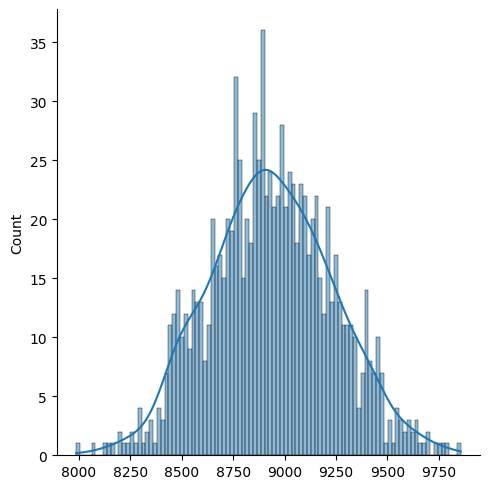

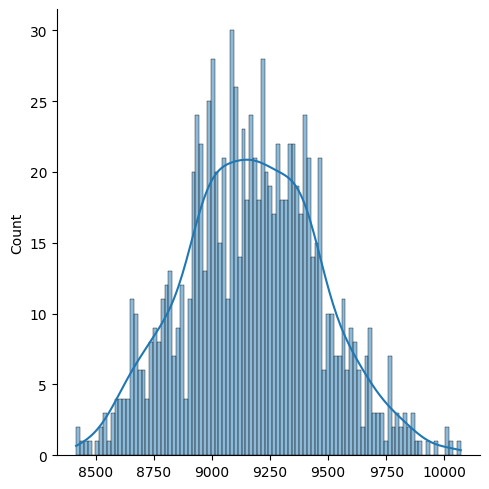

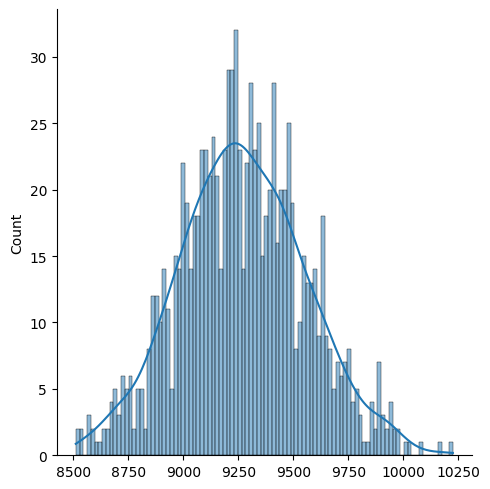

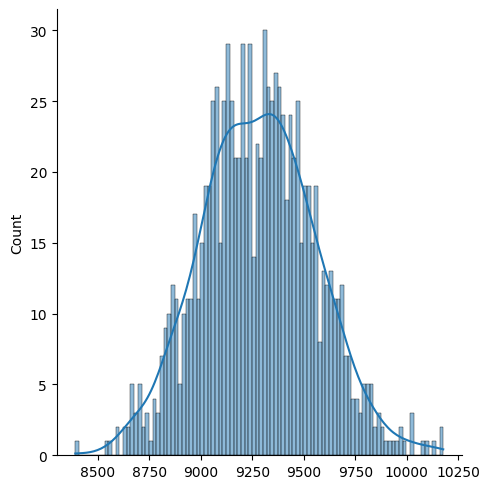

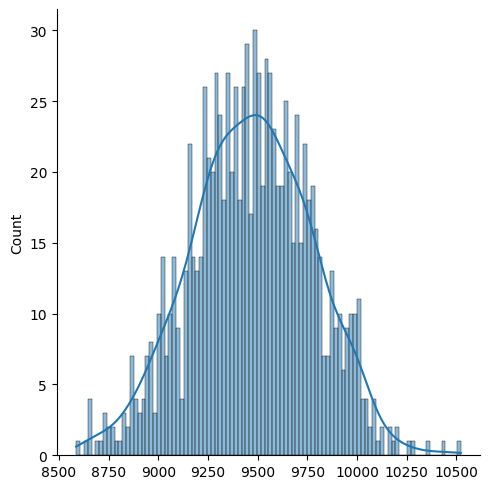

In [63]:
sns.displot(teenagers_sample_means, bins=100,kde=True,)
sns.displot(early20s_sample_means, bins= 100, kde=True)
sns.displot(early30s_sample_means, bins= 100, kde=True)
sns.displot(middleage_sample_means, bins= 100, kde=True)
sns.displot(senior_sample_means, bins= 100, kde=True)
plt.show()

#### Confidence intervals for Age Group

In [64]:
print(f"Teenagers sample mean: {np.mean(teenagers_sample_means)} and standard deviation: {np.std(teenagers_sample_means)}")
print(f"Early 20s sample mean: {np.mean(early20s_sample_means)} and standard deviation: {np.std(early20s_sample_means)}")
print(f"Early 30s sample mean: {np.mean(early30s_sample_means)} and standard deviation: {np.std(early30s_sample_means)}")
print(f"Middle age sample mean: {np.mean(middleage_sample_means)} and standard deviation: {np.std(middleage_sample_means)}")
print(f"Senior sample mean: {np.mean(senior_sample_means)} and standard deviation: {np.std(senior_sample_means)}")

Teenagers sample mean: 8935.700369999999 and standard deviation: 301.0535445715905
Early 20s sample mean: 9175.20723 and standard deviation: 291.5740850373754
Early 30s sample mean: 9269.73943 and standard deviation: 286.4228243957167
Middle age sample mean: 9279.124699999998 and standard deviation: 276.49524127224845
Senior sample mean: 9470.533943333334 and standard deviation: 305.65920789324815


#### what will be the Z score if the confidence interval is 95% and it is a one sided tale test

In [65]:
Lower_limit = np.mean(teenagers_sample_means)- (np.std(teenagers_sample_means)/np.sqrt(1000))
Upper_limit = np.mean(teenagers_sample_means)+ (np.std(teenagers_sample_means)/np.sqrt(1000))
print(f'Lower Limit teenagers: {Lower_limit} and Upper Limit teenagers: {Upper_limit}')

Lower_limit = np.mean(early20s_sample_means)- (np.std(early20s_sample_means)/np.sqrt(1000))
Upper_limit = np.mean(early20s_sample_means)+ (np.std(early20s_sample_means)/np.sqrt(1000))
print(f'Lower Limit early20s: {Lower_limit} and Upper Limit early20s: {Upper_limit}')

Lower_limit = np.mean(early30s_sample_means)- (np.std(early30s_sample_means)/np.sqrt(1000))
Upper_limit = np.mean(early30s_sample_means)+ (np.std(early30s_sample_means)/np.sqrt(1000))
print(f'Lower Limit early30s: {Lower_limit} and Upper Limit early30s: {Upper_limit}')

Lower_limit = np.mean(middleage_sample_means)- (np.std(middleage_sample_means)/np.sqrt(1000))
Upper_limit = np.mean(middleage_sample_means)+ (np.std(middleage_sample_means)/np.sqrt(1000))
print(f'Lower Limit middleage: {Lower_limit} and Upper Limit middleage: {Upper_limit}')

Lower_limit = np.mean(senior_sample_means)- (np.std(senior_sample_means)/np.sqrt(1000))
Upper_limit = np.mean(senior_sample_means)+ (np.std(senior_sample_means)/np.sqrt(1000))
print(f'Lower Limit senior: {Lower_limit} and Upper Limit senior: {Upper_limit}')

Lower Limit teenagers: 8926.180221014865 and Upper Limit teenagers: 8945.220518985132
Lower Limit early20s: 9165.986847846023 and Upper Limit early20s: 9184.427612153977
Lower Limit early30s: 9260.68194501051 and Upper Limit early30s: 9278.796914989489
Lower Limit middleage: 9270.381152753818 and Upper Limit middleage: 9287.868247246179
Lower Limit senior: 9460.868150485878 and Upper Limit senior: 9480.19973618079


In [66]:
# Get the corresponding values of 2.5th and 97.5th percentiles
conf_interval = np.percentile(teenagers_sample_means,[2.5,97.5])
print("The confidence interval: ",conf_interval)

conf_interval = np.percentile(early20s_sample_means,[2.5,97.5])
print("The confidence interval: ",conf_interval)

conf_interval = np.percentile(early30s_sample_means,[2.5,97.5])
print("The confidence interval: ",conf_interval)

conf_interval = np.percentile(middleage_sample_means,[2.5,97.5])
print("The confidence interval: ",conf_interval)

conf_interval = np.percentile(senior_sample_means,[2.5,97.5])
print("The confidence interval: ",conf_interval)


The confidence interval:  [8390.30258333 9548.33966667]
The confidence interval:  [8626.31441667 9765.91833333]
The confidence interval:  [8704.13258333 9871.77541667]
The confidence interval:  [8732.01125    9822.86383333]
The confidence interval:  [ 8870.119      10019.28658333]


## Overall Analysis

In [67]:
df['Age_label'].value_counts()

Early 30s     219587
Middle Age    155714
Early 20s      99660
Senior         60005
Teenager       15102
Name: Age_label, dtype: int64

In [68]:
df['Marital_Status'].value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

In [69]:
df['Product_Category'].value_counts()

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category, dtype: int64

In [70]:
df['City_Category'].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [71]:
df['Occupation'].value_counts()

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64